In [3]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn[1].csv")

# Preview
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Check TotalCharges column
print("Before conversion:")
print(df['TotalCharges'].dtypes)
print(df['TotalCharges'].unique()[:10])  


Before conversion:
object
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']


In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", pd.NA)

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [8]:
print(df['TotalCharges'].isnull().sum())

11


In [9]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [11]:
df['SeniorCitizen'].dtypes

dtype('int64')

In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')


In [13]:
print(df.dtypes)
print(df.isnull().sum()) 

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn   

In [14]:
# Identify types
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include='number').columns.tolist()

print("Categorical Columns:\n", categorical_cols)
print("\nNumerical Columns:\n", numerical_cols)


Categorical Columns:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical Columns:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [16]:
print(df.dtypes)

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (5274, 19), Test shape: (1758, 19)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔷 Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


🔷 Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1291
           1       0.64      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.73      1758
weighted avg       0.79      0.80      0.80      1758

Accuracy: 0.7997724687144482


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n🔶 Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))



🔶 Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1291
           1       0.67      0.38      0.48       467

    accuracy                           0.78      1758
   macro avg       0.74      0.66      0.67      1758
weighted avg       0.77      0.78      0.76      1758

Accuracy: 0.7844141069397043


In [21]:
try:
    from lightgbm import LGBMClassifier

    lgb = LGBMClassifier()
    lgb.fit(X_train, y_train)
    y_pred_lgb = lgb.predict(X_test)

    print("\n🟩 LightGBM")
    print(classification_report(y_test, y_pred_lgb))
    print("Accuracy:", accuracy_score(y_test, y_pred_lgb))

except ImportError:
    print("LightGBM not installed. Run: pip install lightgbm")


[LightGBM] [Info] Number of positive: 1402, number of negative: 3872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 5274, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265832 -> initscore=-1.015871
[LightGBM] [Info] Start training from score -1.015871

🟩 LightGBM
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1291
           1       0.61      0.51      0.56       467

    accuracy                           0.78      1758
   macro avg       0.72      0.70      0.71      1758
weighted avg       0.77      0.78      0.78      1758

Accuracy: 0.7821387940841866


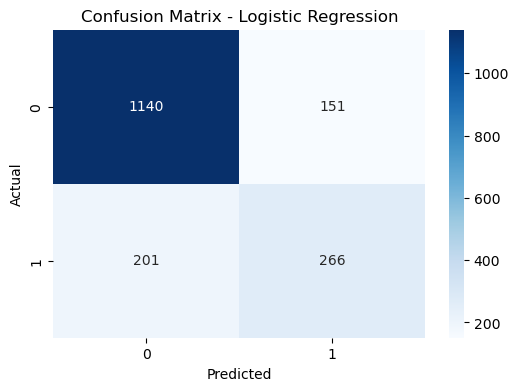

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example with Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


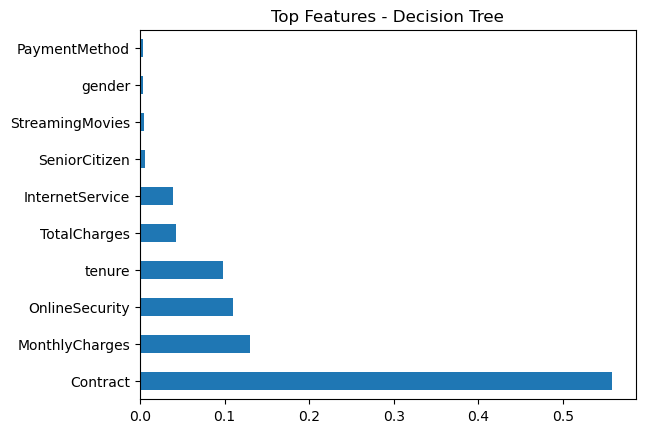

In [23]:
import pandas as pd

features_dt = pd.Series(dt.feature_importances_, index=X.columns)
features_dt.nlargest(10).plot(kind='barh', title="Top Features - Decision Tree")
plt.show()


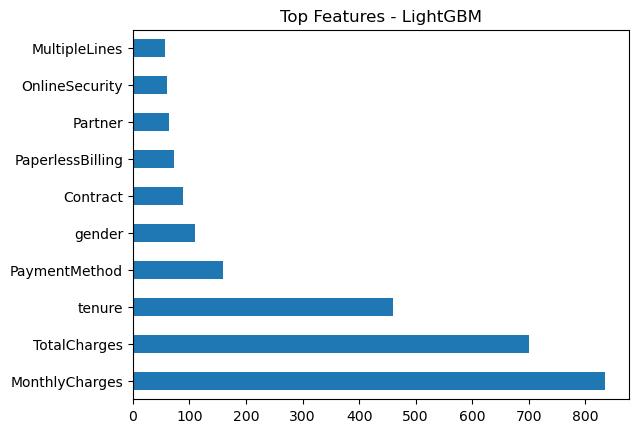

In [24]:
if 'lgb' in globals():
    features_lgb = pd.Series(lgb.feature_importances_, index=X.columns)
    features_lgb.nlargest(10).plot(kind='barh', title="Top Features - LightGBM")
    plt.show()
